In [54]:
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [55]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,BatchNormalization,Dropout,Dense
from tensorflow.keras import optimizers

In [57]:
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-c_irt6kg
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-c_irt6kg
  Resolved https://github.com/tensorflow/docs to commit 940d94cb568bcdd4e82402eff3403ddcf5f874f2
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.5.3.31743-py3-none-any.whl size=182531 sha256=b2063109a4d386aa7c7e006e40219d28db874cd61fd55ef6aa295fc0d5fd45cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-xbzn16_9/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [58]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns




In [59]:
tf.random.set_seed(13)
tf.debugging.set_log_device_placement(True)

In [12]:
num1 = int(input('Please enter an integer value: '))
num2 = int(input('Please enter another integer value: '))
print(f"{num1} + {num2} = { num1 + num2}")

Please enter an integer value: 10
Please enter another integer value: 20
10 + 20 = 30


In [30]:
def average_grades():
  i = []
  while True:
      try :
        i.append(int(input('Please enter a grade: (Enter a letter to quit)')))
      except ValueError:
          break
      except:
          print("unexpected")
          break
  return sum(i)/len(i)

print(average_grades())


Please enter a grade: (Enter a letter to quit)370
Please enter a grade: (Enter a letter to quit)330
Please enter a grade: (Enter a letter to quit)350
Please enter a grade: (Enter a letter to quit)38
Please enter a grade: (Enter a letter to quit)3o
39.5


In [60]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [6]:
all_ds=pd.read_csv('BostonHousing.csv')

In [61]:
all_ds.shape
all_ds.info()
all_ds.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [62]:
all_ds.isnull().sum()
tempds=all_ds.sample(frac=1,random_state=13)
tempds.shape

(506, 14)

In [63]:
train_data,test_data=train_test_split(tempds,test_size=0.2,random_state=13)
train_data.shape,test_data.shape

((404, 14), (102, 14))

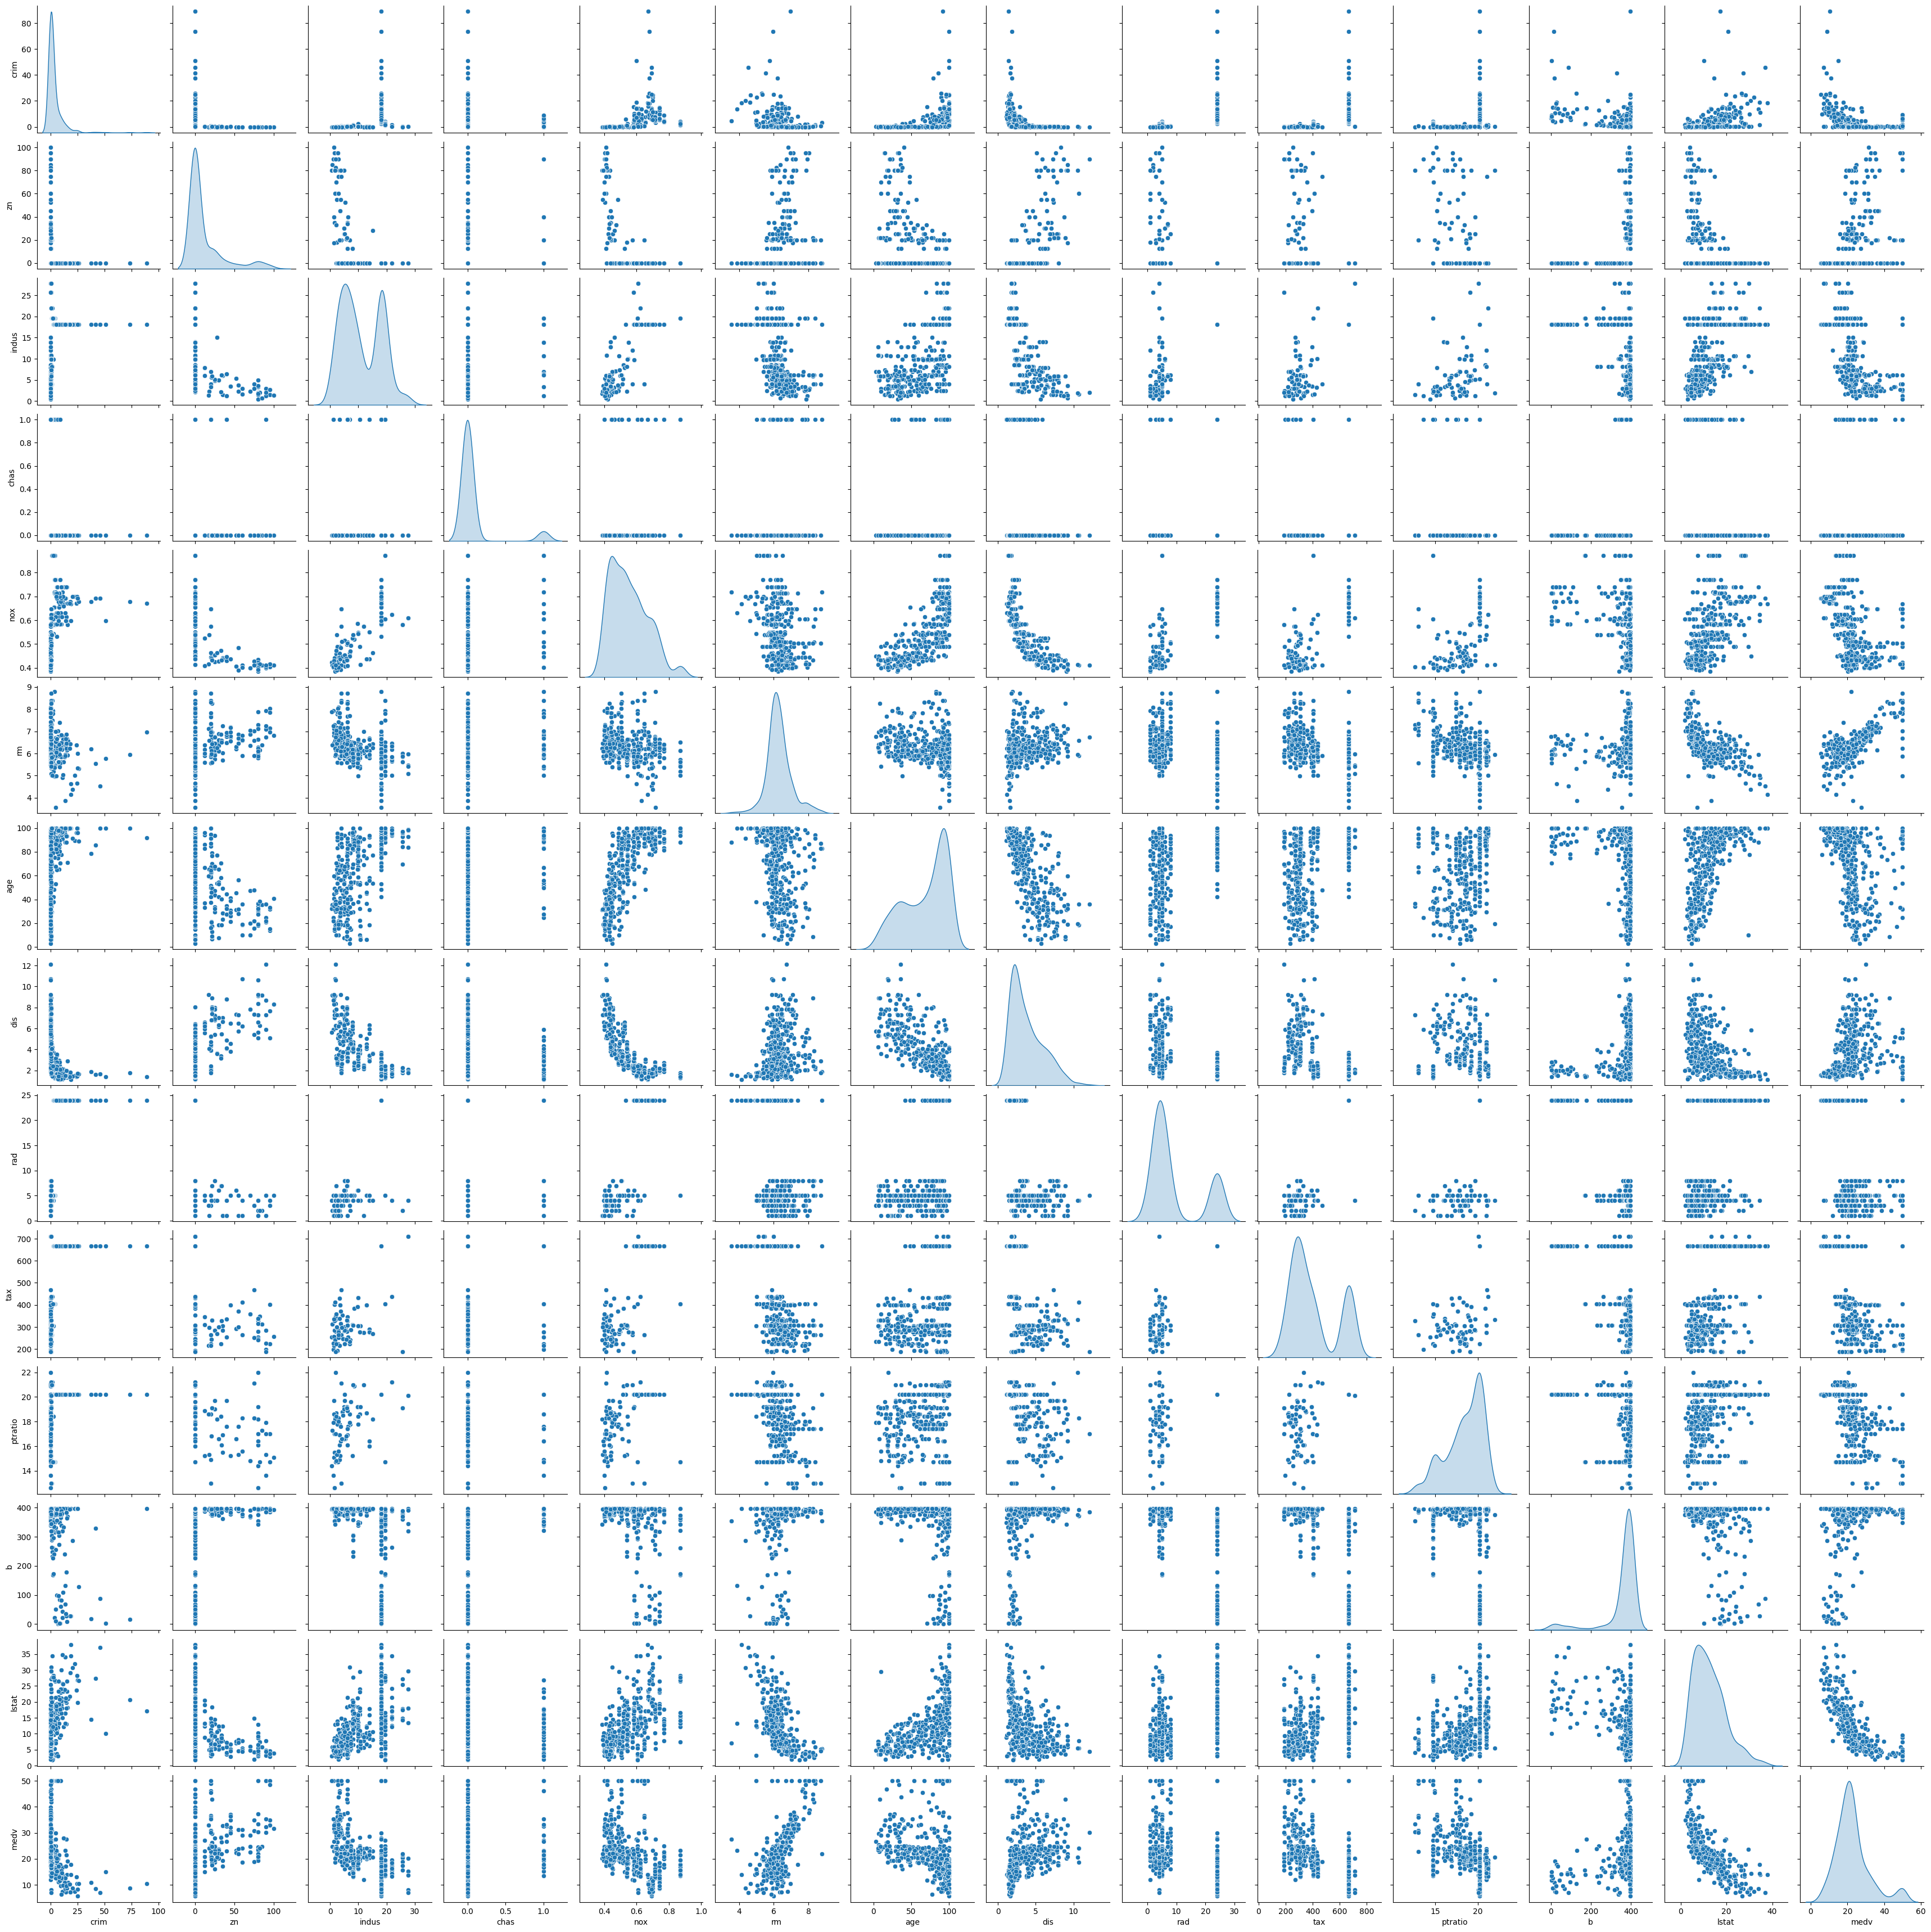

In [64]:
train_stats=train_data.describe()
train_stats.pop('medv')
train_stats=train_stats.transpose()
train_stats
sns.pairplot(train_data,diag_kind='kde')

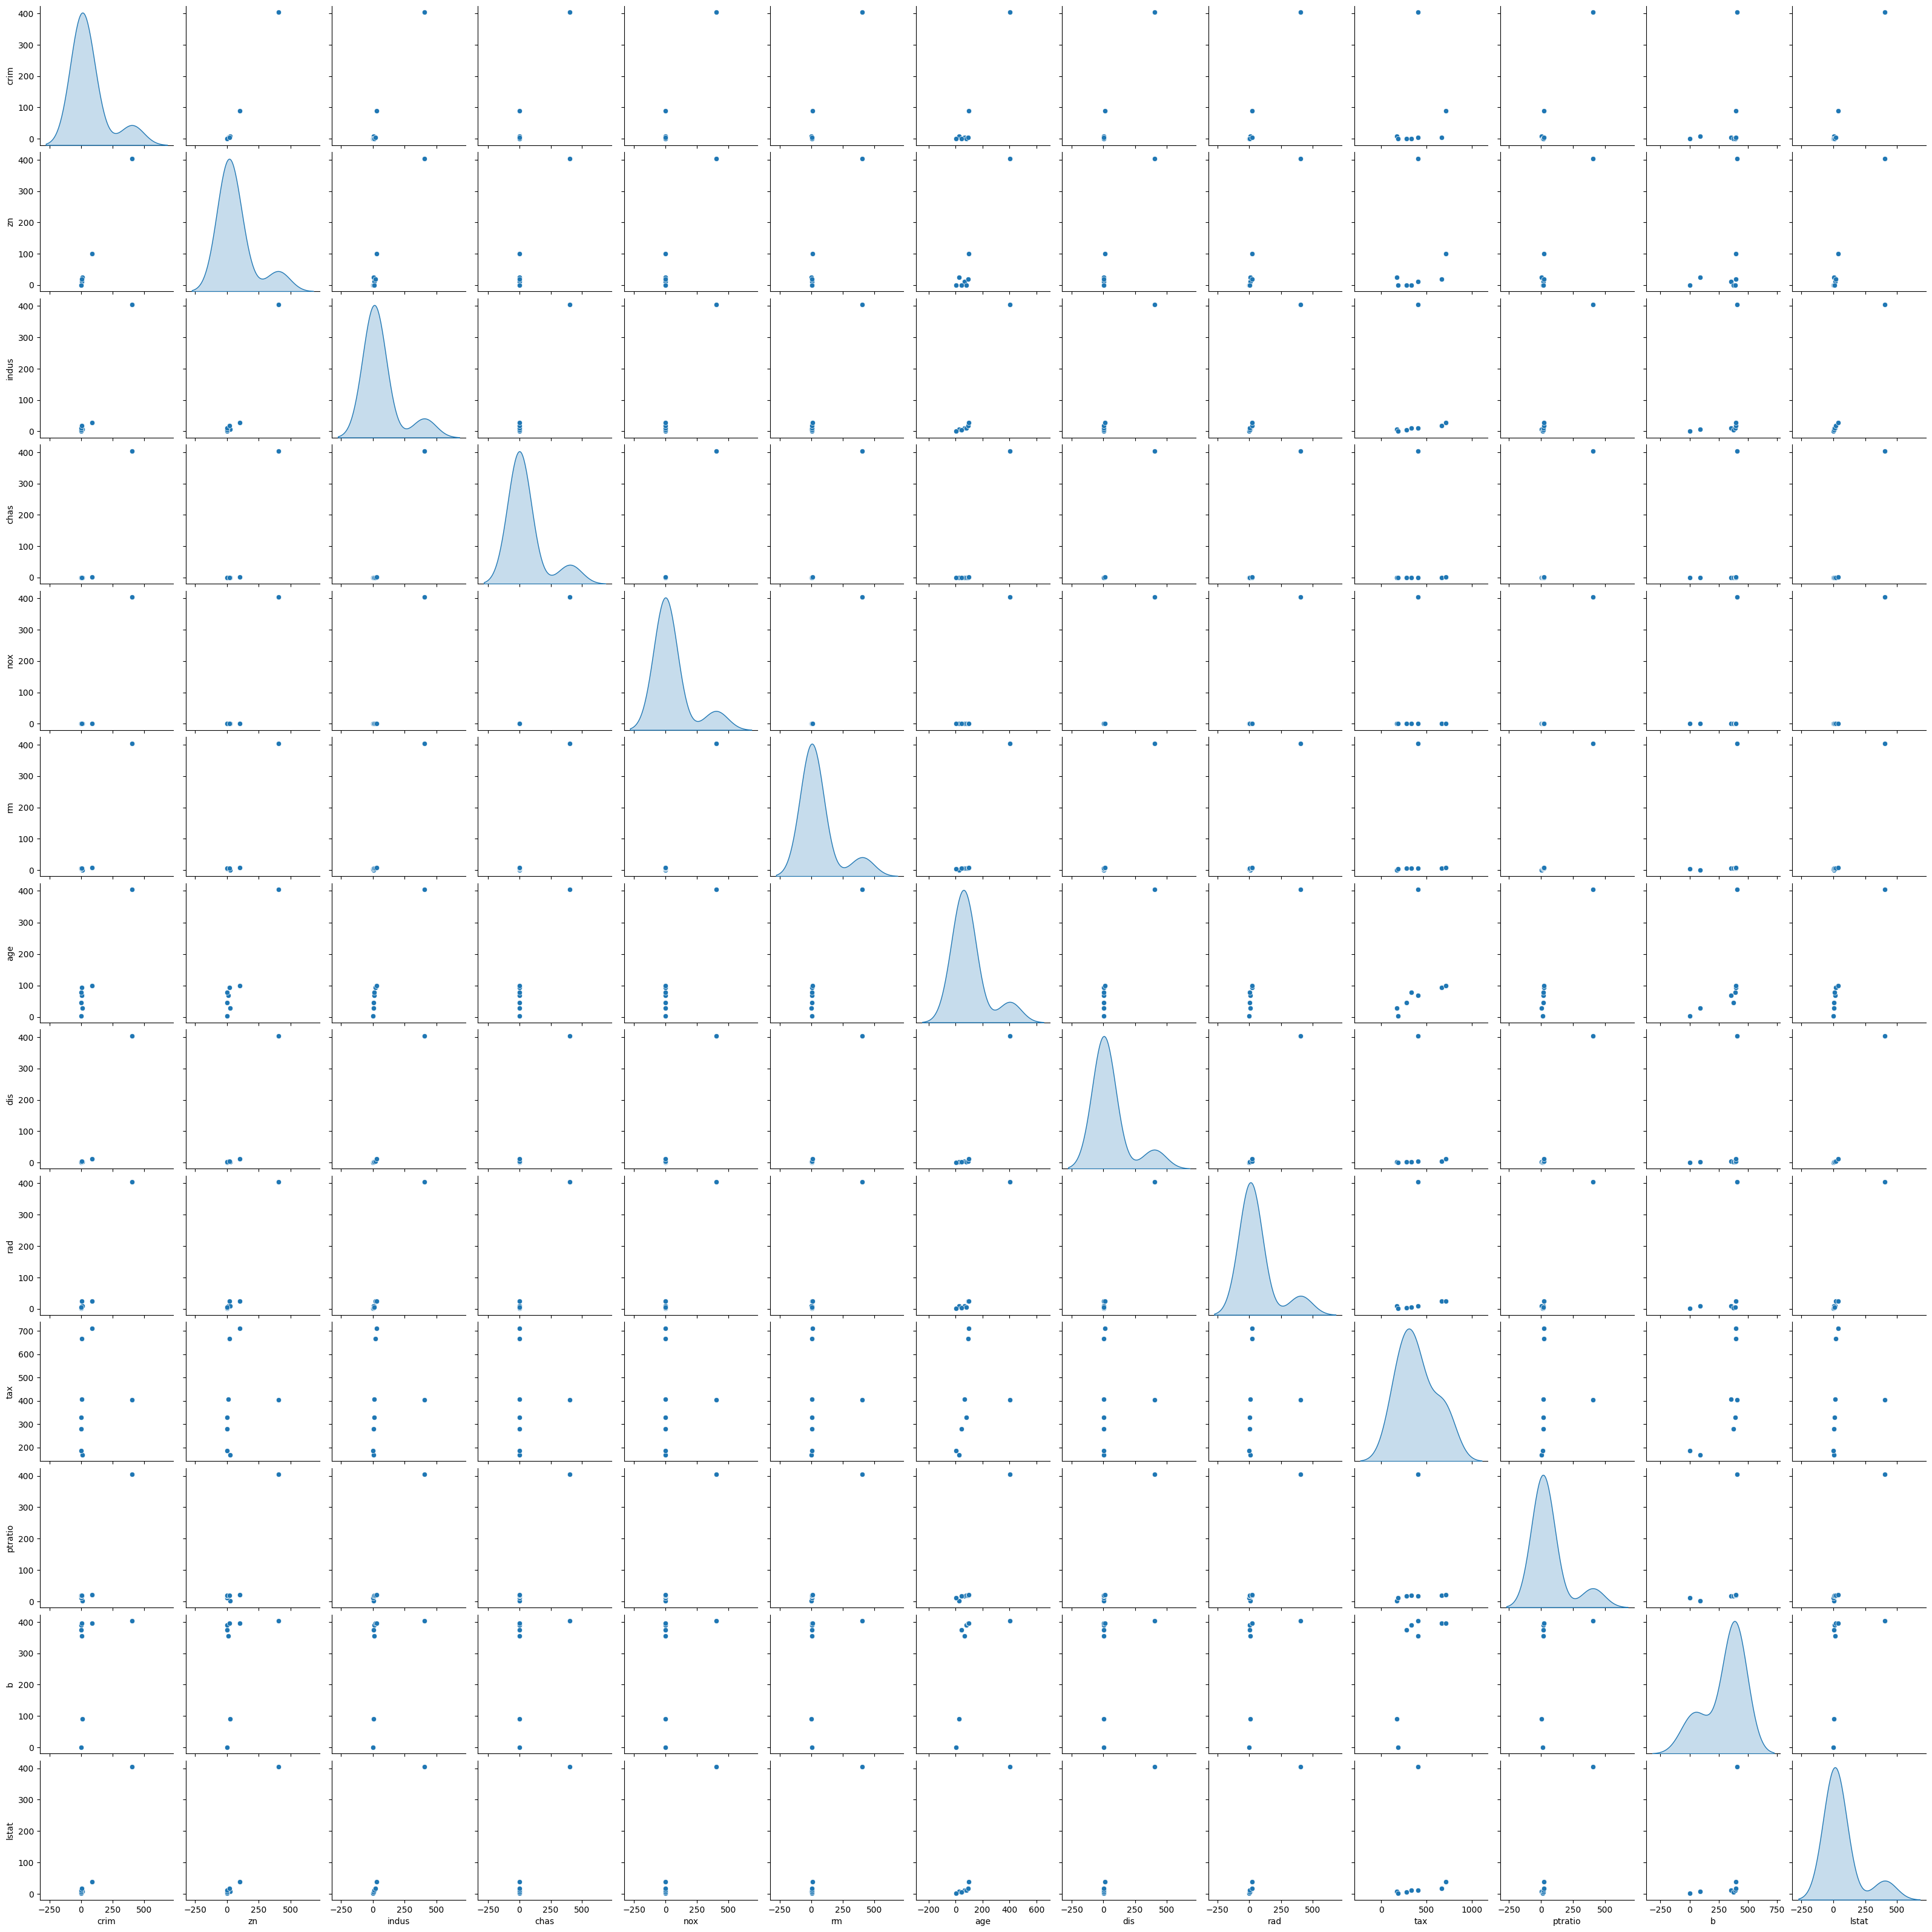

In [32]:
sns.pairplot(train_stats[train_stats.columns],diag_kind='kde')

In [74]:
train_labels=train_data.pop('medv')
test_labels=test_data.pop('medv')
Datasets ={}
def norm(x:pd.DataFrame):
  Datasets['name']=x
  Datasets['mean']=x.mean()
  Datasets['std']=x.std()
  return (x-train_stats['mean'])/train_stats['std']
def re_nrom(x:pd.DataFrame):

  return x*Datasets['std']+Datasets['mean']
normed_train_data=norm(train_data)
normed_test_data=norm(test_data)

In [75]:
def build_model1_two_hidden_layers():
  model=Sequential()
  model.add(Dense(10,input_shape=(normed_train_data.shape[1],)))
  model.add(Dense(50,Activation('relu')))
  model.add(Dense(50,Activation('relu')))
  model.add(Dense(1))

  learning_rate=0.001
  optimizer=optimizers.RMSprop(learning_rate=learning_rate)
  model.compile(loss='mse',optimizer=optimizer,metrics=['mse'])
  return model

In [76]:
def build_model2_three_hidden_layers():
  model=Sequential()
  model.add(Dense(32,input_shape=(normed_train_data.shape[1],)))
  model.add(Dense(32,Activation('relu')))
  model.add(Dense(64,Activation('relu')))
  model.add(Dense(128,Activation('relu')))
  model.add(Dense(1))

  learning_rate=0.01
  optimizer=optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss='mse',optimizer=optimizer,metrics=['mse'])
  return model

In [77]:
def build_model3_five_hidden_layers():
  model=Sequential()
  model.add(Dense(32,input_shape=(normed_train_data.shape[1],)))
  model.add(Dense(64,Activation('relu')))
  model.add(Dense(64,Activation('relu')))
  model.add(Dense(64,Activation('relu')))
  model.add(Dense(64,Activation('relu')))
  model.add(Dense(64,Activation('relu')))
  model.add(Dense(1))

  learning_rate=0.001
  optimizer=optimizers.RMSprop(learning_rate=learning_rate)
  model.compile(loss='mse',optimizer=optimizer,metrics=['mse'])
  return model

In [78]:
model=build_model1_two_hidden_layers()
model.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:C

In [79]:
model=build_model2_three_hidden_layers()
model.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:C

In [80]:
model=build_model3_five_hidden_layers()
model.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

In [81]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_loss',
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=0)

In [ ]:
%%time
EPOCHS=500
btach_size=32
with tf.device('/device:GPU:0'):
      history=model.fit(normed_train_data,
                  train_labels,
                  epochs=EPOCHS,
                  verbose`=0,
                  batch_size=btach_size,
                  validation_split=0.2,
                  steps_per_epoch=normed_train_data.shape[0]//btach_size,
                  callbacks=[tfdocs.modeling.EpochDots(),
                   cp_callback])

Streaming output truncated to the last 5000 lines.
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 28/500
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1880 in device /job:localhost/replica:0/task:0/device:CPU:0
 1/11 [=>............................] - ETA: 0s - loss: 18.2651 - mse: 18.2651Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inferen

KeyboardInterrupt: 

Streaming output truncated to the last 5000 lines.
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2112 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2112 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __infere